In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import time
import tensorflow as tf

# train
import torch
from torch import nn
from torch.nn import functional as F

# load data
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Data normalization

In [68]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,)),  # mean value = 0.1307, standard deviation value = 0.3081
])


## Load the MNIST dataset

In [69]:
data_path = './MNIST'

training_set = datasets.MNIST(root = data_path, train= True, download=True, transform= transform)
testing_set = datasets.MNIST(root = data_path, train= False, download=True, transform= transform)


## Model
* design a neural network that consists of three `fully connected layers` with an activation function of `Sigmoid`
* the activation function for the output layer is `LogSoftmax`

In [70]:
class classification(nn.Module):
    def __init__(self):
        super(classification, self).__init__()
        
        # construct layers for a neural network
        self.classifier1 = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=20*20),
            nn.Sigmoid(),
        ) 
        self.classifier2 = nn.Sequential(
            nn.Linear(in_features=20*20, out_features=10*10),
            nn.Sigmoid(),
        ) 
        self.classifier3 = nn.Sequential(
            nn.Linear(in_features=10*10, out_features=10),
            nn.LogSoftmax(dim=1),
        ) 
        
        
    def forward(self, inputs):                 # [batchSize, 1, 28, 28]
        x = inputs.view(inputs.size(0), -1)    # [batchSize, 28*28]
        x = self.classifier1(x)                # [batchSize, 20*20]
        x = self.classifier2(x)                # [batchSize, 10*10]
        out = self.classifier3(x)              # [batchSize, 10]
        
        return out

## Optimization
* use a stochastic gradient descent algorithm with different mini-batch sizes of 32, 64, 128
* use a constant learning rate for all the mini-batch sizes
* do not use any regularization algorithm such as `dropout` or `weight decay`
* compute the average loss and the average accuracy for all the mini-batches within each epoch

In [76]:
def accuracy(log_pred, y_true):
    y_pred = torch.argmax(log_pred, dim=1)
    return (y_pred == y_true).to(torch.float).mean()

In [75]:
batch_size = 32
lr=0.5
n_epochs = 20

no_cuda = True
use_cuda = not no_cuda and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

train_loader = DataLoader(dataset=training_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=testing_set, batch_size=batch_size, shuffle=True)

classifier = classification().to(device)
optimizer = torch.optim.SGD(classifier.parameters(), lr)

criterion = nn.NLLLoss()

accuracy_stats = {
    'train': [],
    "test": []
}
loss_stats = {
    'train': [],
    "test": []
}

for epoch in range(n_epochs):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    
    classifier.train()
    
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        
        optimizer.zero_grad()
        
        y_train_pred = classifier(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = accuracy(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
    with torch.no_grad():
        test_epoch_loss = 0
        test_epoch_acc = 0
        
        classifier.eval()
        
        for X_test_batch, y_test_batch in test_loader:
            X_test_batch, y_test_batch = X_test_batch.to(device), y_test_batch.to(device)
        
            y_test_pred = classifier(X_test_batch)
            
            test_loss = criterion(y_test_pred, y_test_batch)
            test_acc = accuracy(y_test_pred, y_test_batch)
            
            test_epoch_loss += test_loss.item()
            test_epoch_acc += test_acc.item()
            
#     # VALIDATION    
#     with torch.no_grad():
        
#         val_epoch_loss = 0
#         val_epoch_acc = 0
        
#         classifier.eval()
#         for X_val_batch, y_val_batch in test_loader:
#             X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
#             y_val_pred = classifier(X_val_batch)
                        
#             val_loss = criterion(y_val_pred, y_val_batch)
#             val_acc = multi_acc(y_val_pred, y_val_batch)
            
#             val_epoch_loss += val_loss.item()
#             val_epoch_acc += val_acc.item()
            
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['test'].append(test_epoch_loss/len(test_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['test'].append(test_epoch_acc/len(test_loader))
         
print('done')

KeyboardInterrupt: 

In [74]:
print(loss_stats['test'])

[0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281, 0.0648531833662281,

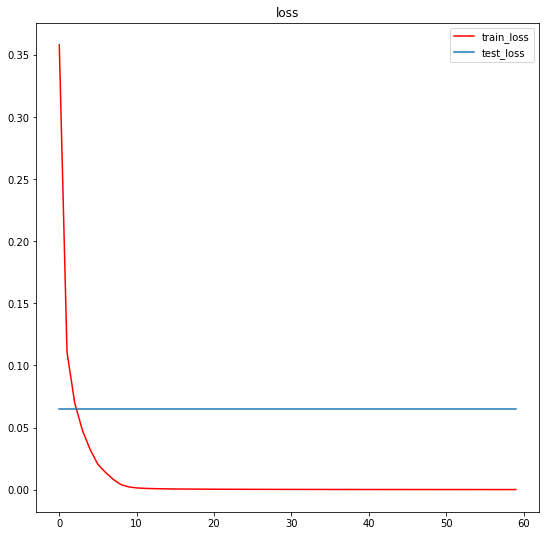

In [73]:
plt.figure(1,figsize=(9,9))
plt.plot(np.array(range(n_epochs)), loss_stats['train'], c='r', label='train_loss')
plt.plot(np.array(range(n_epochs)), loss_stats['test'], label='test_loss')
plt.legend()
plt.title('loss')
plt.show()

## 1. Plot the training and testing losses with a batch size of 32 [4pt]

## 2. Plot the training and testing accuracies with a batch size of 32 [4pt]

## 3. Plot the training and testing losses with a batch size of 64 [4pt]

## 4. Plot the training and testing accuracies with a batch size of 64 [4pt]

## 5. Plot the training and testing losses with a batch size of 128 [4pt]

## 6. Plot the training and testing accuracies with a batch size of 128 [4pt]

## 7. Print the loss at convergence with different mini-batch sizes [3pt]

## 8. Print the accuracy at convergence with different mini-batch sizes [3pt]